<a href="https://colab.research.google.com/github/spantoskey/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Scott_Pantoskey_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

#Use the following Instacart data to answer the assignment questions.

In [1]:
#!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz 

# Make sure we're in the top-level /content directory
#
# See below for notes on the cd command and why it's %cd instead of !cd
%cd /content

# Remove everything in the current working directory
#
# rm is the remove command
# -rf specifies the "recursive" and "force" options to remove all files in 
# subdirectories without prompting
#
# THIS IS A POWERFUL COMMAND!
#
# In this particular case, removing all of the files makes things easier if you
# need to re-run these examples by allowing you start with a clean directory
# every time.
!rm -rf *

# wget retrieves files from a remote location
!wget https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip

/content
--2020-10-28 22:01:47--  https://www.dropbox.com/s/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip [following]
--2020-10-28 22:01:48--  https://www.dropbox.com/s/raw/pofcl26lvoj6073/instacart-market-basket-analysis.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9fb902545cc9c1813144b897c1.dl.dropboxusercontent.com/cd/0/inline/BCInH-TpjUpifKMcW-XhE_CiKkh37hAA4pvzFQw78kV_loUdj_kQKtGYfsAeVKVFGJttWe6g5hUHKdtPDB2aUalvYHfexQrYhwyPSNU-ryvQyAEMrqSi_f4iTq3Ojs_src4/file# [following]
--2020-10-28 22:01:48--  https://uc9fb902545cc9c1813144b897c1.dl.dropboxusercontent.com/cd/0/inline/BCInH-TpjUpifKMcW-XhE_CiKkh37hAA4

In [2]:
# Unzip the archive
#
# Creates a new directory called instacart-market-basket-analysis

!unzip instacart-market-basket-analysis.zip

Archive:  instacart-market-basket-analysis.zip
   creating: instacart-market-basket-analysis/
  inflating: __MACOSX/._instacart-market-basket-analysis  
  inflating: instacart-market-basket-analysis/order_products__prior.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._order_products__prior.csv.zip  
  inflating: instacart-market-basket-analysis/.DS_Store  
  inflating: __MACOSX/instacart-market-basket-analysis/._.DS_Store  
  inflating: instacart-market-basket-analysis/order_products__train.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._order_products__train.csv.zip  
  inflating: instacart-market-basket-analysis/aisles.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._aisles.csv.zip  
  inflating: instacart-market-basket-analysis/orders.csv.zip  
  inflating: __MACOSX/instacart-market-basket-analysis/._orders.csv.zip  
  inflating: instacart-market-basket-analysis/departments.csv.zip  
  inflating: __MACOSX/instacart-market-baske

In [3]:
# Change into the newly-unzipped directory
#
# % sign is required to change to a new directory -- you can't use !cd like
# other commands
#
# Optional technical details:
#
# % makes the command apply to the **entire notebook environment**, which is
# what you need to do to change the working directory
#
# The ! sign **opens a new shell process** behind the scenes to execute the
# command -- this works fine for regular commands like unzip and ls
#
# Therefore, !cd would apply only to that new shell and wouldn't change the
# global notebook environment
#
# If this makes your heard hurt, don't worry too much about it. We'll talk
# more about the shell and operating systems stuff later in the program.

%cd instacart-market-basket-analysis

/content/instacart-market-basket-analysis


In [4]:
# Unzip all .csv.zip files in the directory
!unzip "*.zip"

Archive:  orders.csv.zip
  inflating: orders.csv              
   creating: __MACOSX/
  inflating: __MACOSX/._orders.csv   

Archive:  products.csv.zip
  inflating: products.csv            
  inflating: __MACOSX/._products.csv  

Archive:  order_products__prior.csv.zip
  inflating: order_products__prior.csv  
  inflating: __MACOSX/._order_products__prior.csv  

Archive:  departments.csv.zip
  inflating: departments.csv         
  inflating: __MACOSX/._departments.csv  

Archive:  aisles.csv.zip
  inflating: aisles.csv              
  inflating: __MACOSX/._aisles.csv   

Archive:  order_products__train.csv.zip
  inflating: order_products__train.csv  
  inflating: __MACOSX/._order_products__train.csv  

6 archives were successfully processed.


In [5]:
# List all csv files in the current directory
# -l specifies the "long" listing format, which includes additional info on each file
# -h specifies "human readable" file size units
!ls -l -h *.csv

-rw-r--r-- 1 root root 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 root root  270 May  2  2017 departments.csv
-rw-r--r-- 1 root root 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 root root  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 root root 104M May  2  2017 orders.csv
-rw-r--r-- 1 root root 2.1M May  2  2017 products.csv


#Use the follwing information to answer the assignment questions.

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

1) Save the products.csv file as a data frame called product_names.  Print the first 5 rows of product_names.

In [76]:
### YOUR CODE HERE ###
import pandas as pd
df = pd.read_csv('products.csv')
product_names = pd.DataFrame(df)
print(product_names.head())

   product_id  ... department_id
0           1  ...            19
1           2  ...            13
2           3  ...             7
3           4  ...             1
4           5  ...            13

[5 rows x 4 columns]


2) Read in order_products_prior.csv and order_products_train.csv.  Concatenate them into one dataset called order_product_link.

In [77]:
### YOUR CODE HERE ###
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_trial = pd.read_csv('order_products__train.csv')
order_product_link = pd.concat([order_products_prior, order_products_trial])
print(order_product_link.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0


3) Use the code below to identify the top 10 most ordered products. Clearly Instacart users really like avocados...

In [78]:
ten_products = ["Banana",
"Bag of Organic Bananas",
"Organic Strawberries",
"Organic Baby Spinach",
"Organic Hass Avocado",
"Organic Avocado",
"Large Lemon",
"Strawberries",
"Limes",
"Organic Whole Milk"]

4) Create a subset of the product_names dataset that includes just the top 10 most ordered products.  Call that dataset product_names_10

In [79]:
## YOUR CODE HERE ###
condition = product_names['product_name'].isin(ten_products)
product_names_10 = product_names[condition]
print(product_names_10)

       product_id            product_name  aisle_id  department_id
13175       13176  Bag of Organic Bananas        24              4
16796       16797            Strawberries        24              4
21136       21137    Organic Strawberries        24              4
21902       21903    Organic Baby Spinach       123              4
24851       24852                  Banana        24              4
26208       26209                   Limes        24              4
27844       27845      Organic Whole Milk        84             16
47208       47209    Organic Hass Avocado        24              4
47625       47626             Large Lemon        24              4
47765       47766         Organic Avocado        24              4


5) Merge the order_product_link dataset with the product_names_10 dataset and print the top 20 rows.  Call the new dataset product_orders.

In [80]:
### YOUR CODE HERE ###
product_orders = pd.merge(order_product_link,product_names_10, on='product_id', how='inner')
print(product_orders.head(100))


    order_id  product_id  ...  aisle_id  department_id
0          3       21903  ...       123              4
1         26       21903  ...       123              4
2         31       21903  ...       123              4
3         39       21903  ...       123              4
4         56       21903  ...       123              4
..       ...         ...  ...       ...            ...
95      1594       21903  ...       123              4
96      1605       21903  ...       123              4
97      1612       21903  ...       123              4
98      1632       21903  ...       123              4
99      1634       21903  ...       123              4

[100 rows x 7 columns]


6) Note that every record product_orders dataset is a single instance in which someone ordered one of the top 10 products.  

Calcluate the number of times each product was ordered.  What was the most frequently ordered food?

In [81]:
### YOUR CODE HERE ###
number_of_orders = product_orders.groupby('product_name')['product_name'].count().sort_values(ascending=False)
highest_selling_product = number_of_orders[[0]]
print(highest_selling_product)


product_name
Banana    491291
Name: product_name, dtype: int64


In [82]:
product_orders['product_name'].value_counts().index[0]

'Banana'

#Now we want to figure out when people are ordering all these bananas.


7) Import orders.csv and name the dataset "orders".  Print the top 5 observations in orders.



In [88]:
### YOUR CODE HERE ###
import pandas as pd
orders = pd.read_csv('orders.csv')
print(orders.head())

   order_id  user_id  ... order_hour_of_day  days_since_prior_order
0   2539329        1  ...                 8                     NaN
1   2398795        1  ...                 7                    15.0
2    473747        1  ...                12                    21.0
3   2254736        1  ...                 7                    29.0
4    431534        1  ...                15                    28.0

[5 rows x 7 columns]


8) Merge the orders dataset and the product_orders dataset so we can see the time each order of each of the top 10 products was placed.

In [96]:
### YOUR CODE HERE ###
merged_dataset = pd.merge(orders[['order_id','order_hour_of_day']],product_orders[['order_id','product_name']],on='order_id',how='inner',sort='days_since_prior_order').drop('order_id',axis=1)
print(merged_dataset)

         order_hour_of_day            product_name
0                       10  Bag of Organic Bananas
1                       10    Organic Hass Avocado
2                       17    Organic Baby Spinach
3                       16  Bag of Organic Bananas
4                       16    Organic Hass Avocado
...                    ...                     ...
2418309                 10      Organic Whole Milk
2418310                 11                  Banana
2418311                 11      Organic Whole Milk
2418312                 18            Strawberries
2418313                  6                  Banana

[2418314 rows x 2 columns]


9) Create a subset of order_times that includes only orders of Bananas.  Call that dataset Bananas.

In [97]:
### YOUR CODE HERE ###
bananas = merged_dataset[merged_dataset['product_name'].str.contains('Banana')]
print(bananas)

         order_hour_of_day            product_name
0                       10  Bag of Organic Bananas
3                       16  Bag of Organic Bananas
5                        8                  Banana
10                      17                  Banana
11                       8                  Banana
...                    ...                     ...
2418302                  8  Bag of Organic Bananas
2418304                 14  Bag of Organic Bananas
2418305                 16  Bag of Organic Bananas
2418310                 11                  Banana
2418313                  6                  Banana

[886221 rows x 2 columns]


10) Run the following code to show a histogram of the times of banana orders (times after noon are written as 13 hours, 14 hours, etc.)

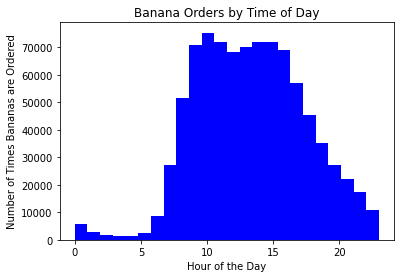

In [98]:
import matplotlib.pyplot as plt

plt.hist(bananas['order_hour_of_day'],bins=24, color='blue')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Times Bananas are Ordered')
plt.title('Banana Orders by Time of Day')

plt.show()

11) When were bananas most frequently ordered?

Answer here: Bananas were most frequently purchased at 10am.

12) Were avocados ordered at a different time a day?  Modify the code below by replacing the ??? to create a histogram of order times of Organic Haas Avocados.

         order_hour_of_day          product_name
1                       10  Organic Hass Avocado
4                       16  Organic Hass Avocado
18                      13  Organic Hass Avocado
27                      20  Organic Hass Avocado
33                      12  Organic Hass Avocado
...                    ...                   ...
2418273                 20  Organic Hass Avocado
2418289                 11  Organic Hass Avocado
2418296                 17  Organic Hass Avocado
2418299                 20  Organic Hass Avocado
2418301                 17  Organic Hass Avocado

[220877 rows x 2 columns]


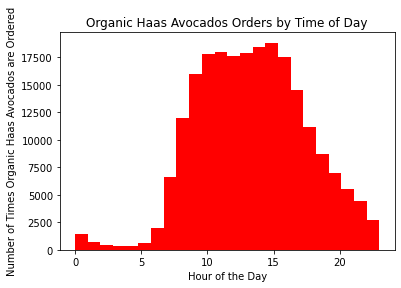

In [111]:
#Calculate mean order times by product

Haas_avocado = merged_dataset[merged_dataset['product_name'] == 'Organic Hass Avocado']

print(Haas_avocado)
import matplotlib.pyplot as plt

plt.hist(Haas_avocado['order_hour_of_day'],bins=24, color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Times Organic Haas Avocados are Ordered')
plt.title ('Organic Haas Avocados Orders by Time of Day')

plt.show()

Answer here: The most avocados were purchased around 3pm.

# Portfolio Project Milestone

Watch the Showcase Project (formerly known as Build Week) kickoff video to get a sense of what you will accomplish over the next few weeks:
https://youtu.be/WYi9EXH-9lU